# MNIST Handwritten Digits Classification

#### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

`fetch_openml()` returns data as DataFrame unless the dataset is sparse. The MNIST dataset contains images and DataFrame are not ideal for this, so we will set **as_frame=False** to get the data as NumPy arrays.

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

## Exploring Dataset

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data, mnist.data.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (70000, 784))

Our data includes 70000 images and each image have **784** features. Each feature corresponds the one pixel and we can think each image as a **28x28** pixel image.

In [5]:
mnist.feature_names[:5], mnist.feature_names[-5:]

(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5'],
 ['pixel780', 'pixel781', 'pixel782', 'pixel783', 'pixel784'])

In [6]:
mnist.target, np.unique(mnist.target)

(array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object))

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

### Some of the images

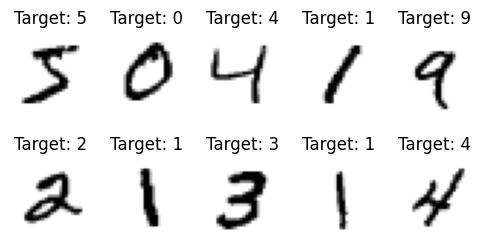

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(6, 3))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.set_title("Target: {}".format(y[i]))
    ax.axis("off")

### Dıstrubition of the Numbers

Text(0.5, 1.0, 'Distribution of MNIST classes')

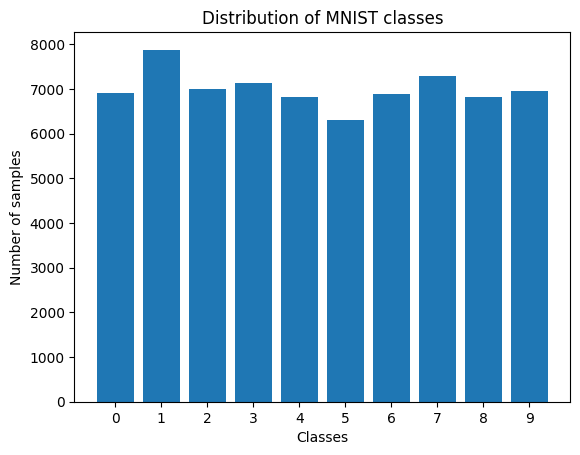

In [12]:
unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Distribution of MNIST classes')

### Splitting Dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Support Vector Machine

Since the SVM classifier scales poorly with the size of the training set, we won't use the whole training set.

In [16]:
from sklearn.svm import SVC

# default -> kernel='rbf', C=1, gamma='scale', probability=False
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train[:10000], y_train[:10000])
y_pred_svm = svm.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

def print_classification_report(y_pred, model_name):
    """
    Prints the classification_report and accuracy score for a passed predictions.
    
    Parameters:
    ----------
    y_pred :  The predicted target values for the test set.
    model_name:  The name of the model.
    """
    print('Accuracy of {}: {:.2f}%'.format(model_name, accuracy_score(y_test, y_pred) * 100))
    print(classification_report(y_test, y_pred))

In [23]:
print_classification_report(y_pred_svm, "SVM")

Accuracy of SVM: 96.14%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.97      0.98      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.94      0.94      0.94      1433
           4       0.95      0.96      0.96      1295
           5       0.96      0.95      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.96      0.94      0.95      1357
           9       0.95      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [20]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_pred, labels=np.unique(mnist.target)):
    """
    Plots confusion matrix according the predicted classes.
    
    Paramters:
    ----------
    y_pred: The predicted target values for the test set.
    labels: default=np.unique(mnist.target)
        The class labels used for the confusion matrix.
    
    """
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')

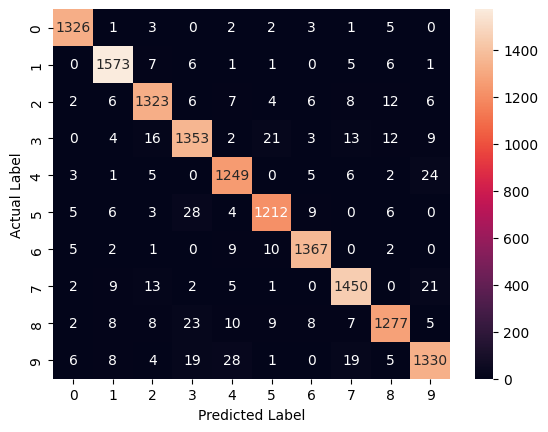

In [24]:
plot_confusion_matrix(y_pred=y_pred_svm)

- If we interpret the results, the classes 3 and 9 have slightly false negatives comparing the other classes.

- However, if we look at the classification report, we see that the model achieved high precision, recall, and F1-score for most of the classes. 

- This means the SVM model's perfromance is satisfying.

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [27]:
print_classification_report(y_pred_rf, "Random Forest")

Accuracy of Random Forest: 96.73%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



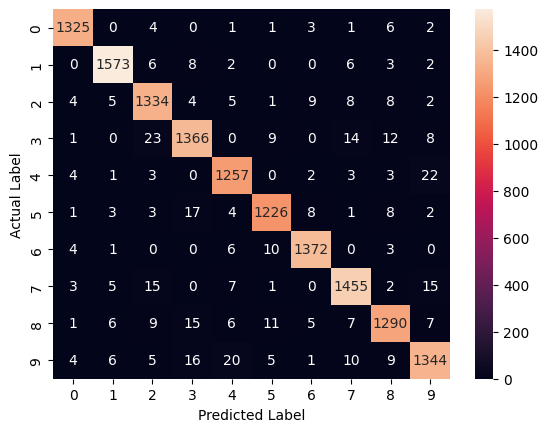

In [28]:
plot_confusion_matrix(y_pred_rf)

- Since large data set is not problem for Random Forest, we trained the model using using whole train set.

- Random Forest is slightly better from SVM. Probably, this is because of using much data for training Random Forest model.

## Ensemble Method - Voting Classifier

Voting classifier is an ensemble method that consist of multiple classifiers. Voting classifier try to improve final prediction by leveraging strength of multiple models and mitigating the weaknesses of individual models.

- In this ensemble method, default voting strategy is `hard`. This means that it doesn't consider probabilities of classes. That is, it looks number of votes each classes. 
- Since we are using two classifier, it will be good think weights of each classes. This strategy is called as `soft` voting. This requires that each class must have predict_proba() method. For this reason we must make SVC's probability paramater to the true.

In [29]:
from sklearn.ensemble import VotingClassifier


svm_ensemble = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
rf_ensemble = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble = VotingClassifier(estimators=[('svm', svm_ensemble), ('rf', rf_ensemble)], voting='soft')
ensemble.fit(X_train[:20000], y_train[:20000])
y_pred_ensemble = ensemble.predict(X_test)

In [31]:
print_classification_report(y_pred_ensemble, "Voting Classifier")

Accuracy of Voting Classifier: 96.93%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.96      0.96      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



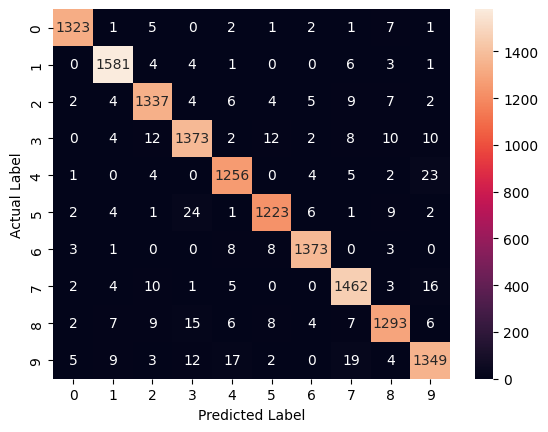

In [32]:
plot_confusion_matrix(y_pred_ensemble)

- We get slightly better model copmared to the Random Forest. Also, we didn't use the whole training set.

- To improve our models perfomance we can aplly performance tuning.

## Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV


def grid_search(model, X_train, y_train, param_grid, cv=5):
    """
    Performs grid search passed hyperparameters dictionary for a machine learning model.
    
    Parameters:
    -----------
    model: machine learning model
    X_train: 2D array object consist of the training data features
    y_train: 1D array object consist of the training data labels
    param_grid: hyperparameter dictionary
    cv: number of folds for cross-validation
    """
    
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print('Best Parameters:', grid_search.best_params_)

### Tuning SVM

In [34]:
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search(SVC(kernel='rbf', probability=True), X_train[:3000], y_train[:3000], param_grid_svm)

Best Parameters: {'C': 10}


In [35]:
svm_tuned = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
svm_tuned.fit(X_train[:10000], y_train[:10000])
y_pred_tuned_svm = svm_tuned.predict(X_test)

In [36]:
print_classification_report(y_pred_tuned_svm, "SVM")

Accuracy of SVM: 96.78%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.95      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.96      0.96      0.96      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.94      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



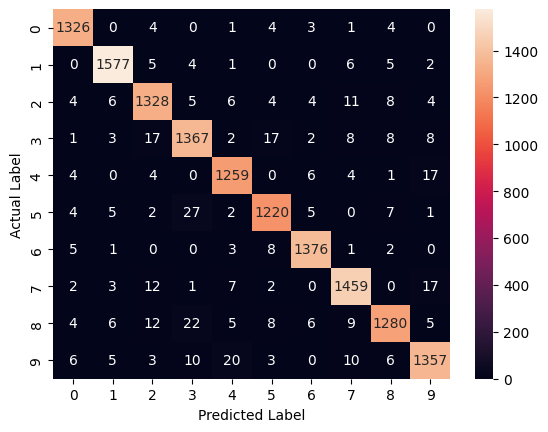

In [37]:
plot_confusion_matrix(y_pred_tuned_svm)

There is a little improvement for SVM

### Tuning Random Forest

In [38]:
param_grid_rf = {'n_estimators': [50, 100, 150, 200, 250, 300]}
grid_search(RandomForestClassifier(random_state=42), X_train[:10000], y_train[:10000], param_grid_rf)

Best Parameters: {'n_estimators': 300}


In [39]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_tuned = rf.predict(X_test)

In [40]:
print_classification_report(y_pred_rf_tuned, "Random Forest")

Accuracy of Random Forest: 96.88%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



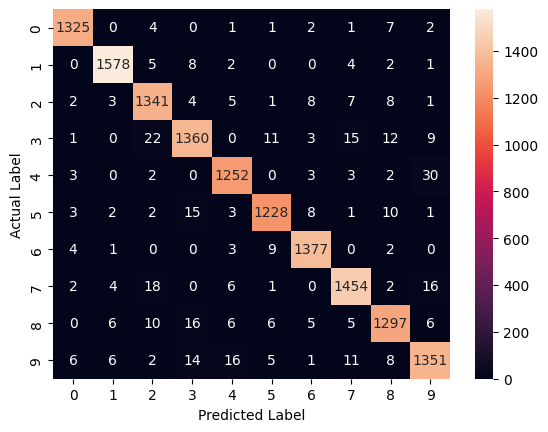

In [41]:
plot_confusion_matrix(y_pred_rf_tuned)